<a href="https://colab.research.google.com/github/souravmondal01/Marriage-Trends-in-India-Love-vs.-Arranged/blob/main/Marriage_Trends_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ak0212_marriage_trends_in_india_love_vs_arranged_path = kagglehub.dataset_download('ak0212/marriage-trends-in-india-love-vs-arranged')

print('Data source import complete.')


Data source import complete.


### Marriage Trends in India: Love vs. Arranged

#### Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading and Initial Exploration](#Data-Loading-and-Initial-Exploration)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
   - [Distribution of Marriage Type in the Data](#Distribution-of-Marriage-Type-in-the-Data)
   - [Trends in Marriage Type Over Time](#Trends-in-Marriage-Type-Over-Time)
   - [Age at Marriage by Marriage Type](#Age-at-Marriage-by-Marriage-Type)
   - [Education Level Distribution](#Education-Level-Distribution)
   - [Parental Approval Analysis](#Parental-Approval-Analysis)
   - [Urban vs. Rural Split](#Urban-vs-Rural-Split)
   - [Marriage Type by Religion](#Marriage-Type-by-Religion)
   - [Marital Satisfaction Analysis](#Marital-Satisfaction-Analysis)
   - [Divorce Trends](#Divorce-Trends)
   - [Inter-Caste and Inter-Religion Marriages](#Inter-Caste-and-Inter-Religion-Marriages)
   - [Spouse Working Status](#Spouse-Working-Status)
   - [Children Count Analysis](#Children-Count-Analysis)
   - [Dowry Trends by Urban/Rural](#Dowry-Trends-by-Urban/Rural)
   - [Marriage Trends by Income Level](#Marriage-Trends-by-Income-Level)
5. [Summary of Findings](#Summary-of-Findings)
6. [Additional Analysis Suggestions](#Additional-Analysis-Suggestions)


### Introduction
This notebook analyzes marriage trends in India, comparing "Love" and "Arranged" marriages using the dataset from Kaggle: [Marriage Trends in India - Love vs. Arranged](https://www.kaggle.com/datasets/ak0212/marriage-trends-in-india-love-vs-arranged). We explore various factors such as age, education, parental approval, urban/rural divide, religion, marital satisfaction, divorce rates, and more.

### Data Loading and Initial Exploration

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style='whitegrid') # Setting up visualization style


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [13]:
# Load the dataset
df = pd.read_csv(f'{ak0212_marriage_trends_in_india_love_vs_arranged_path}/marriage_data_india.csv')

In [14]:
# Display the first few rows of the dataset
df.head(5)

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes


In [15]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10000 non-null  int64 
 1   Marriage_Type         10000 non-null  object
 2   Age_at_Marriage       10000 non-null  int64 
 3   Gender                10000 non-null  object
 4   Education_Level       10000 non-null  object
 5   Caste_Match           10000 non-null  object
 6   Religion              10000 non-null  object
 7   Parental_Approval     10000 non-null  object
 8   Urban_Rural           10000 non-null  object
 9   Dowry_Exchanged       10000 non-null  object
 10  Marital_Satisfaction  10000 non-null  object
 11  Divorce_Status        10000 non-null  object
 12  Children_Count        10000 non-null  int64 
 13  Income_Level          10000 non-null  object
 14  Years_Since_Marriage  10000 non-null  int64 
 15  Spouse_Working        10000 non-null 

**Comments:**
- We import essential libraries for data analysis and visualization.
- The dataset is loaded from the specified Kaggle path.
- `head(5)` shows the first five rows to understand the structure.
- `info()` provides an overview of data types and missing values.

### Data Preprocessing

In [16]:
# Get the current year
current_year = datetime.now().year

# Calculate the Year of Marriage
df['Year_of_Marriage'] = current_year - df['Years_Since_Marriage']

# Verify the new column
df.head()

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion,Year_of_Marriage
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No,1991
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes,1983
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No,2000
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No,2013
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes,1984


**Comments:**
- A new column `Year_of_Marriage` is created by subtracting `Years_Since_Marriage` from the current year (2025 as of March 08, 2025).
- This helps analyze trends over time.

### Exploratory Data Analysis (EDA)
#### Distribution of Marriage Type in the Data

<ipython-input-17-39d56bda5238>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Marriage_Type', palette='viridis')


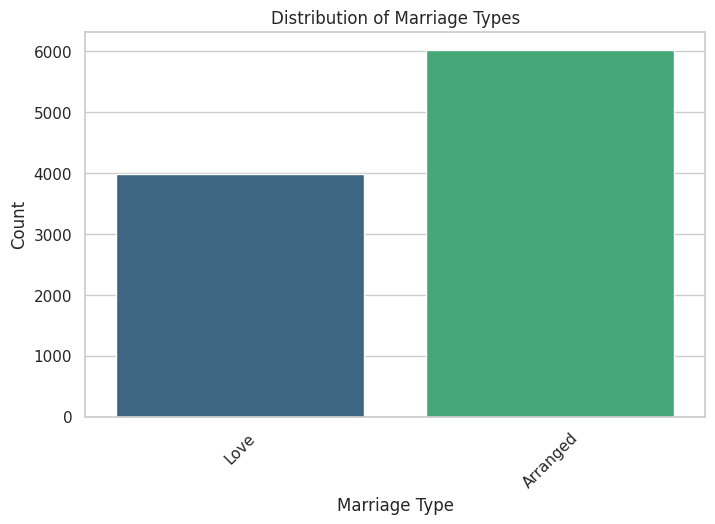

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Marriage_Type', palette='viridis')
plt.title('Distribution of Marriage Types')
plt.xlabel('Marriage Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Trends in Marriage Type Over Time

In [18]:
# Calculate the percentage split per Year_of_Marriage
yearly_counts = df.groupby(['Year_of_Marriage','Marriage_Type']).size().unstack(fill_value=0)
yearly_percent = yearly_counts.div(yearly_counts.sum(axis=1),axis=0) * 100 # Convert to %
yearly_percent

Marriage_Type,Arranged,Love
Year_of_Marriage,,
1976,64.171123,35.828877
1977,70.053476,29.946524
1978,62.702703,37.297297
1979,63.000000,37.000000
1980,64.186047,35.813953
1981,59.905660,40.094340
1982,60.000000,40.000000
1983,59.715640,40.284360
1984,59.633028,40.366972


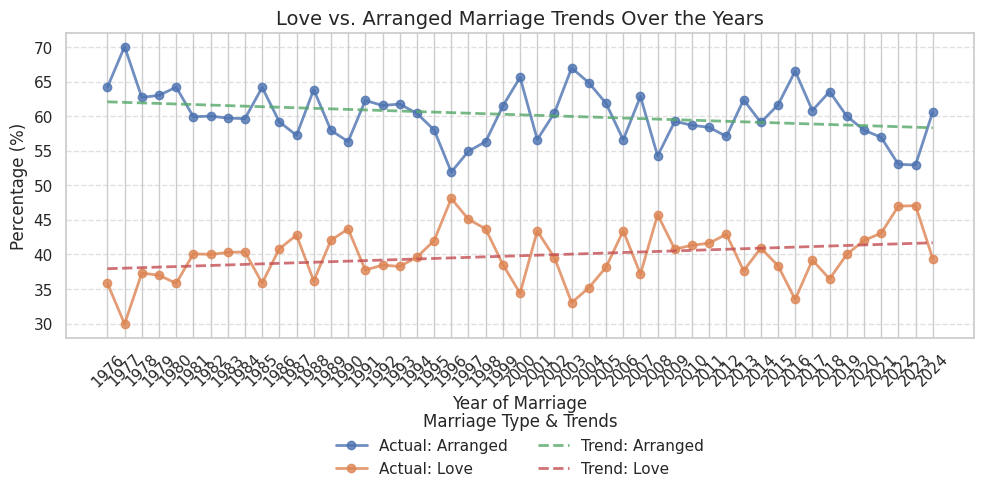

In [19]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual data as a **line graph** instead of a bar chart
for marriage_type in yearly_percent.columns:
    ax.plot(yearly_percent.index, yearly_percent[marriage_type], marker='o', linestyle='solid', label=f'Actual: {marriage_type}', linewidth=2, alpha=0.8)

# Overlay trend lines
for marriage_type in yearly_percent.columns:
    x = yearly_percent.index.astype(int)  # Convert index (year) to int
    y = yearly_percent[marriage_type]

    # Fit a linear regression line
    slope, intercept = np.polyfit(x, y, 1)  # y = mx + c
    trend_line = slope * x + intercept

    # Plot the trend line
    ax.plot(x, trend_line, linestyle='dashed', linewidth=2, label=f'Trend: {marriage_type}', alpha=0.8)

# Formatting
ax.set_title('Love vs. Arranged Marriage Trends Over the Years', fontsize=14)
ax.set_xlabel('Year of Marriage', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticks(yearly_percent.index)
ax.set_xticklabels(yearly_percent.index, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.6)

legend = ax.legend(title='Marriage Type & Trends', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)

# Adjust layout to prevent legend from overlapping
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leaves space at the bottom for the legend

# Show the plot
plt.show()


**Comments:**
- This section visualizes the percentage of Love vs. Arranged marriages over time.
- A line graph with trend lines shows the evolution and direction of these trends.

#### Age at Marriage by Marriage Type

In [20]:
average_age = df.groupby('Marriage_Type')['Age_at_Marriage'].mean()
average_age

,Age_at_Marriage
Marriage_Type,
Arranged,28.473929
Love,28.549020


**Comments:**
- Computes the mean age at marriage for Love and Arranged marriages.

#### Education Level Distribution

In [21]:
# Count occurrences of Education Level per Marriage Type
parental_counts = df.groupby('Education_Level')['Marriage_Type'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Marriage_Type         Arranged           Love
Education_Level                              
Graduate          2342 (59.4%)   1601 (40.6%)
PhD               592 (61.28%)   374 (38.72%)
Postgraduate     1203 (59.61%)   815 (40.39%)
School           1885 (61.34%)  1188 (38.66%)


**Comments:**
- Analyzes the distribution of education levels within each marriage type.

#### Parental Approval Analysis

In [22]:
# Count occurrences of Parental Approval per Marriage Type
parental_counts = df.groupby('Marriage_Type')['Parental_Approval'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Parental_Approval            No        Partial            Yes
Marriage_Type                                                
Arranged            587 (9.75%)  1190 (19.76%)  4245 (70.49%)
Love               446 (11.21%)   763 (19.18%)  2769 (69.61%)


**Comments:**
- Examines the extent of parental approval in Love vs. Arranged marriages.

#### Urban vs. Rural Split

In [23]:
# Count occurrences of Marriage by Urban Vs Rural
parental_counts = df.groupby('Urban_Rural')['Marriage_Type'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Marriage_Type       Arranged           Love
Urban_Rural                                
Rural          2387 (60.37%)  1567 (39.63%)
Urban          3635 (60.12%)  2411 (39.88%)


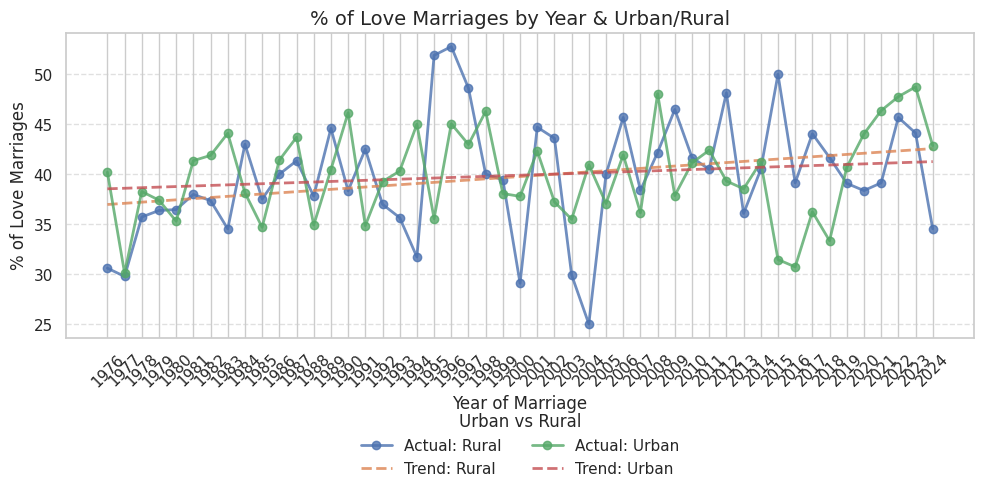

In [24]:
# Step 1: Calculate % of Love Marriages per Year for each Urban/Rural category
love_marriages = df[df['Marriage_Type'] == 'Love'].groupby(['Year_of_Marriage', 'Urban_Rural']).size()
total_marriages = df.groupby(['Year_of_Marriage', 'Urban_Rural']).size()
love_percentage = (love_marriages / total_marriages * 100).unstack(fill_value=0)

# Step 2: Plot the graph
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over Urban & Rural categories to plot data and trend lines
for location in love_percentage.columns:
    x = love_percentage.index.astype(int)
    y = love_percentage[location]

    # Plot actual data as a line graph
    ax.plot(x, y, marker='o', linestyle='solid', label=f'Actual: {location}', linewidth=2, alpha=0.8)

    # Fit a linear trend line
    slope, intercept = np.polyfit(x, y, 1)
    trend_line = slope * x + intercept
    ax.plot(x, trend_line, linestyle='dashed', linewidth=2, label=f'Trend: {location}', alpha=0.8)

# Formatting
ax.set_title('% of Love Marriages by Year & Urban/Rural', fontsize=14)
ax.set_xlabel('Year of Marriage', fontsize=12)
ax.set_ylabel('% of Love Marriages', fontsize=12)
ax.set_xticks(love_percentage.index)
ax.set_xticklabels(love_percentage.index, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Move the legend below the graph
ax.legend(title='Urban vs Rural', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Show the plot
plt.show()

**Comments:**
- Investigates how marriage types differ between urban and rural settings.

#### Marriage Type by Religion

In [25]:
# Count occurrences of Maraige Type per Religion
parental_counts = df.groupby('Religion')['Marriage_Type'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Marriage_Type       Arranged           Love
Religion                                   
Christian       621 (62.73%)   369 (37.27%)
Hindu          3640 (60.32%)  2394 (39.68%)
Muslim         1156 (59.62%)   783 (40.38%)
Others           308 (58.0%)    223 (42.0%)
Sikh             297 (58.7%)    209 (41.3%)


**Comments:**
- Explores the preference for Love vs. Arranged marriages across religions.

#### Marital Satisfaction Analysis

In [26]:
# Count occurrences of Urbal Marital Satisfaction per Marriage Type
parental_counts = df.groupby('Marriage_Type')['Marital_Satisfaction'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Marital_Satisfaction           High            Low         Medium
Marriage_Type                                                    
Arranged              1811 (30.07%)  1197 (19.88%)  3014 (50.05%)
Love                  1182 (29.71%)   809 (20.34%)  1987 (49.95%)


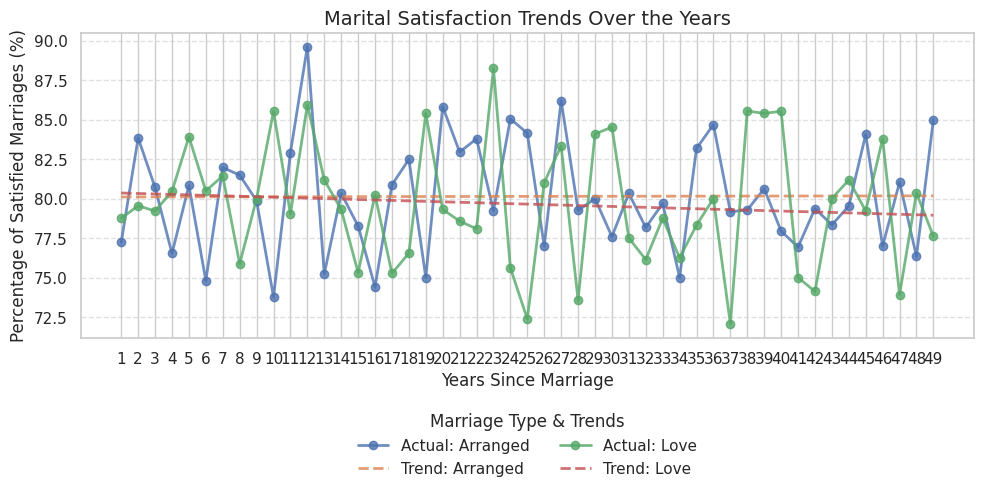

In [27]:
# Marital Satisfaction trends over time
df_satisfied = df[df['Marital_Satisfaction'].isin(['High', 'Medium'])]
total_marriages = df.groupby(['Years_Since_Marriage', 'Marriage_Type']).size()
satisfied_marriages = df_satisfied.groupby(['Years_Since_Marriage', 'Marriage_Type']).size()
satisfaction_percentage = (satisfied_marriages / total_marriages).unstack(fill_value=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
for marriage_type in satisfaction_percentage.columns:
    ax.plot(satisfaction_percentage.index, satisfaction_percentage[marriage_type], marker='o', linestyle='solid',
            label=f'Actual: {marriage_type}', linewidth=2, alpha=0.8)
    x = satisfaction_percentage.index.astype(int)
    y = satisfaction_percentage[marriage_type]
    slope, intercept = np.polyfit(x, y, 1)
    trend_line = slope * x + intercept
    ax.plot(x, trend_line, linestyle='dashed', linewidth=2, label=f'Trend: {marriage_type}', alpha=0.8)
ax.set_title('Marital Satisfaction Trends Over the Years', fontsize=14)
ax.set_xlabel('Years Since Marriage', fontsize=12)
ax.set_ylabel('Percentage of Satisfied Marriages (%)', fontsize=12)
ax.set_xticks(satisfaction_percentage.index)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(title='Marriage Type & Trends', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

**Comments:**
- Assesses marital satisfaction levels and their trends over time.

#### Divorce Trends

In [28]:
# Count occurrences of Divorce Status per Marriage Type
parental_counts = df.groupby('Marriage_Type')['Divorce_Status'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Divorce_Status             No           Yes
Marriage_Type                              
Arranged        5423 (90.05%)   599 (9.95%)
Love            3576 (89.89%)  402 (10.11%)


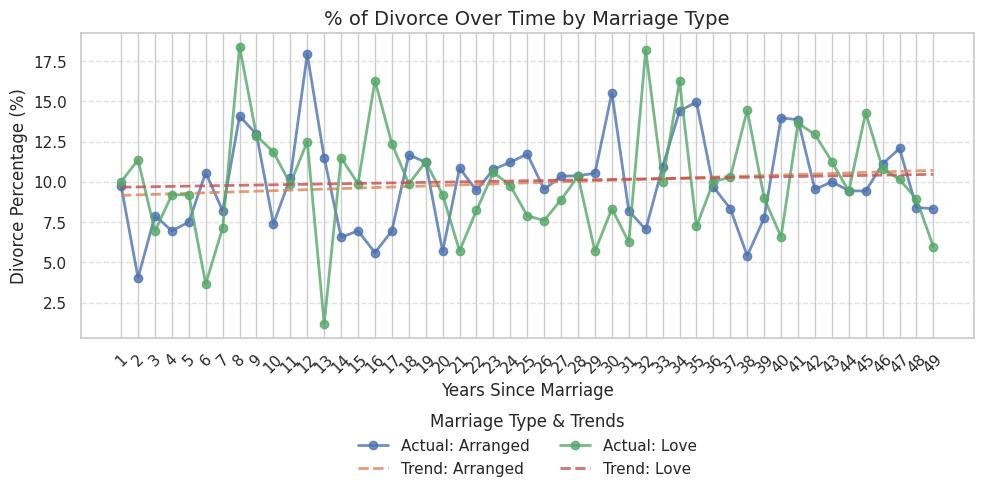

In [29]:
# Divorce trends over time
# Calculate total marriages per year and per marriage type
total_marriages = df.groupby(['Years_Since_Marriage', 'Marriage_Type']).size().unstack(fill_value=0)

# Count number of divorces per year and per marriage type
divorces = df[df['Divorce_Status'] == 'Yes'].groupby(['Years_Since_Marriage', 'Marriage_Type']).size().unstack(fill_value=0)

# Calculate percentage of divorces
divorce_percentage = (divorces / total_marriages) * 100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual divorce percentage as a line graph
for marriage_type in divorce_percentage.columns:
    ax.plot(divorce_percentage.index, divorce_percentage[marriage_type], marker='o', linestyle='solid', label=f'Actual: {marriage_type}', linewidth=2, alpha=0.8)

    # Trend Line Calculation
    x = divorce_percentage.index.astype(int)
    y = divorce_percentage[marriage_type]

    # Fit a linear regression line
    slope, intercept = np.polyfit(x, y, 1)
    trend_line = slope * x + intercept

    # Plot trend line
    ax.plot(x, trend_line, linestyle='dashed', linewidth=2, label=f'Trend: {marriage_type}', alpha=0.8)

# Formatting
ax.set_title('% of Divorce Over Time by Marriage Type', fontsize=14)
ax.set_xlabel('Years Since Marriage', fontsize=12)
ax.set_ylabel('Divorce Percentage (%)', fontsize=12)
ax.set_xticks(divorce_percentage.index)
ax.set_xticklabels(divorce_percentage.index, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Move legend below the graph
legend = ax.legend(title='Marriage Type & Trends', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)

# Adjust layout to prevent legend from overlapping
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Show the plot
plt.show()


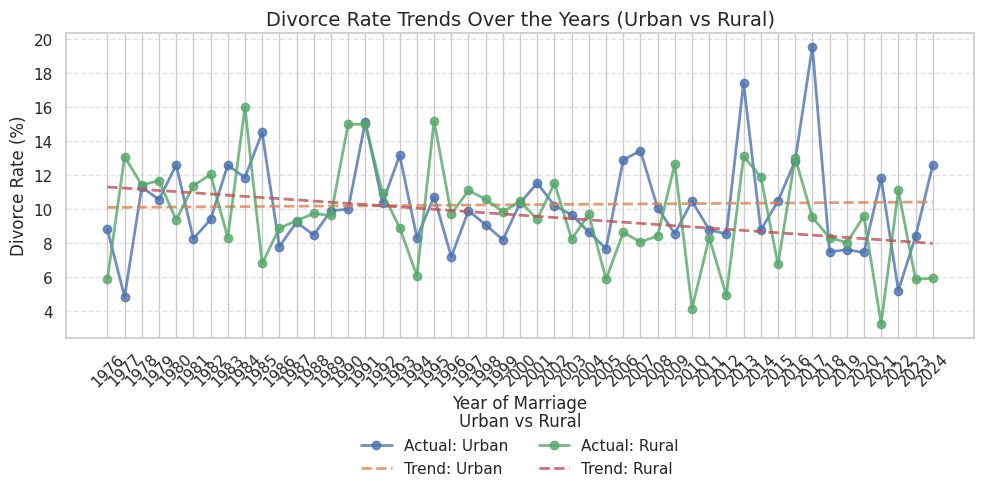

In [30]:
# Divorce Rate by Year and Urban/Rural
total_marriages = df.groupby(['Year_of_Marriage', 'Urban_Rural']).size().unstack(fill_value=0)
divorces = df[df['Divorce_Status'] == 'Yes'].groupby(['Year_of_Marriage', 'Urban_Rural']).size().unstack(fill_value=0)
divorce_percent = (divorces / total_marriages) * 100

fig, ax = plt.subplots(figsize=(10, 6))
for area in ['Urban', 'Rural']:
    if area in divorce_percent.columns:
        ax.plot(divorce_percent.index, divorce_percent[area], marker='o', linestyle='solid',
                label=f'Actual: {area}', linewidth=2, alpha=0.8)
        x = divorce_percent.index.astype(int)
        y = divorce_percent[area].fillna(0)
        slope, intercept = np.polyfit(x, y, 1)
        trend_line = slope * x + intercept
        ax.plot(x, trend_line, linestyle='dashed', linewidth=2, label=f'Trend: {area}', alpha=0.8)
ax.set_title('Divorce Rate Trends Over the Years (Urban vs Rural)', fontsize=14)
ax.set_xlabel('Year of Marriage', fontsize=12)
ax.set_ylabel('Divorce Rate (%)', fontsize=12)
ax.set_xticks(divorce_percent.index)
ax.set_xticklabels(divorce_percent.index, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(title='Urban vs Rural', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

**Comments:**
- Analyzes divorce rates and their trends over time by marriage type.
- Compares divorce rates between urban and rural areas over time.

#### Inter-Caste and Inter-Religion Marriages

In [31]:
# Count occurrences of Inter-Caste marriage per Marriage Type
parental_counts = df.groupby('Marriage_Type')['Inter-Caste'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Inter-Caste               No            Yes
Marriage_Type                              
Arranged       4251 (70.59%)  1771 (29.41%)
Love           2781 (69.91%)  1197 (30.09%)


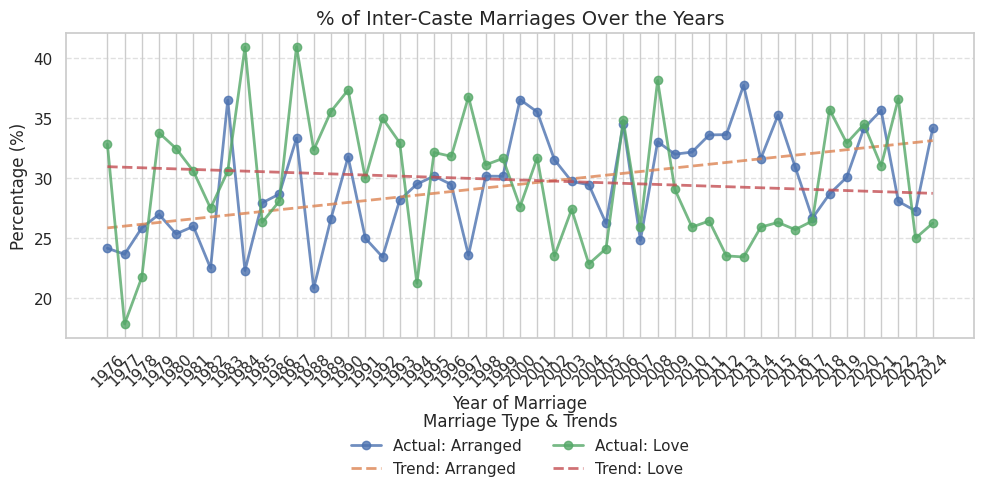

In [32]:
# Inter-Caste trends over time
inter_caste_counts = df[df['Inter-Caste'] == 'Yes'].groupby(['Year_of_Marriage', 'Marriage_Type']).size()
total_counts = df.groupby(['Year_of_Marriage', 'Marriage_Type']).size()
inter_caste_percentage = (inter_caste_counts / total_counts).unstack(fill_value=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
for marriage_type in inter_caste_percentage.columns:
    ax.plot(inter_caste_percentage.index, inter_caste_percentage[marriage_type], marker='o', linestyle='solid',
            label=f'Actual: {marriage_type}', linewidth=2, alpha=0.8)
    x = inter_caste_percentage.index.astype(int)
    y = inter_caste_percentage[marriage_type]
    slope, intercept = np.polyfit(x, y, 1)
    trend_line = slope * x + intercept
    ax.plot(x, trend_line, linestyle='dashed', linewidth=2, label=f'Trend: {marriage_type}', alpha=0.8)
ax.set_title('% of Inter-Caste Marriages Over the Years', fontsize=14)
ax.set_xlabel('Year of Marriage', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticks(inter_caste_percentage.index)
ax.set_xticklabels(inter_caste_percentage.index, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(title='Marriage Type & Trends', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

In [33]:
# Inter-Religion by Marriage Type
parental_counts = df.groupby('Marriage_Type')['Inter-Religion'].value_counts().unstack(fill_value=0)
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"
print("Inter-Religion Marriages by Marriage Type:")
print(parental_summary)

Inter-Religion Marriages by Marriage Type:
Inter-Religion             No            Yes
Marriage_Type                               
Arranged        4794 (79.61%)  1228 (20.39%)
Love            3178 (79.89%)   800 (20.11%)


In [34]:
# Count occurrences of Inter-Caste marriage per Income Level
parental_counts = df.groupby('Income_Level')['Inter-Caste'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Inter-Caste              No            Yes
Income_Level                              
High          1443 (71.33%)   580 (28.67%)
Low           2058 (68.74%)   936 (31.26%)
Middle        3531 (70.86%)  1452 (29.14%)


In [35]:
# Count occurrences of Inter-Religion marriage per Marriage Type
parental_counts = df.groupby('Marriage_Type')['Inter-Religion'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Inter-Religion             No            Yes
Marriage_Type                               
Arranged        4794 (79.61%)  1228 (20.39%)
Love            3178 (79.89%)   800 (20.11%)


In [36]:
# Count occurrences of Inter-Religion marriage per Income Level
parental_counts = df.groupby('Income_Level')['Inter-Religion'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)

Inter-Religion             No           Yes
Income_Level                               
High             1588 (78.5%)   435 (21.5%)
Low             2399 (80.13%)  595 (19.87%)
Middle          3985 (79.97%)  998 (20.03%)


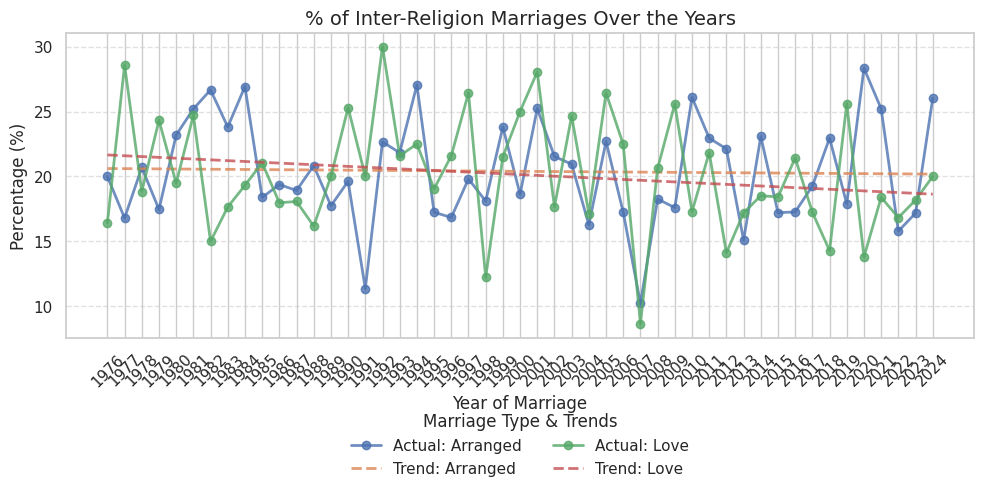

In [37]:
# Calculate total marriages per year per type
total_marriages = df.groupby(['Year_of_Marriage', 'Marriage_Type']).size()

# Calculate inter-religion marriages per year per type
inter_religion_counts = df[df['Inter-Religion'] == 'Yes'].groupby(['Year_of_Marriage', 'Marriage_Type']).size()

# Compute % of inter-religion marriages
inter_religion_percent = (inter_religion_counts / total_marriages * 100).unstack(fill_value=0)

# Plot actual data as a line graph
fig, ax = plt.subplots(figsize=(10, 6))

for marriage_type in inter_religion_percent.columns:
    ax.plot(inter_religion_percent.index, inter_religion_percent[marriage_type], marker='o', linestyle='solid',
            label=f'Actual: {marriage_type}', linewidth=2, alpha=0.8)

    # Fit and plot trend line
    x = inter_religion_percent.index.astype(int)
    y = inter_religion_percent[marriage_type]
    slope, intercept = np.polyfit(x, y, 1)  # Linear regression
    trend_line = slope * x + intercept
    ax.plot(x, trend_line, linestyle='dashed', linewidth=2, label=f'Trend: {marriage_type}', alpha=0.8)

# Formatting
ax.set_title('% of Inter-Religion Marriages Over the Years', fontsize=14)
ax.set_xlabel('Year of Marriage', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticks(inter_religion_percent.index)
ax.set_xticklabels(inter_religion_percent.index, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Move legend below the graph
ax.legend(title='Marriage Type & Trends', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)

# Adjust layout to prevent legend from overlapping
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Show plot
plt.show()

**Comments:**
- Examines the prevalence and trends of inter-caste and inter-religion marriages.

#### Spouse Working Status

In [38]:
# Count occurrences of Spouse Working per Marriage Type
parental_counts = df.groupby('Marriage_Type')['Spouse_Working'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Spouse_Working             No            Yes
Marriage_Type                               
Arranged        3034 (50.38%)  2988 (49.62%)
Love            1919 (48.24%)  2059 (51.76%)


In [39]:
# Count occurrences of Spouse Working by Income Level
parental_counts = df.groupby('Income_Level')['Spouse_Working'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)

Spouse_Working             No            Yes
Income_Level                                
High             994 (49.13%)  1029 (50.87%)
Low              1503 (50.2%)   1491 (49.8%)
Middle          2456 (49.29%)  2527 (50.71%)


**Comments:**
- Analyzes the employment status of spouses in Love vs. Arranged marriages and by Income Level

#### Children Count Analysis

In [40]:
# Average number of children by Marriage Type
average_children = df.groupby('Marriage_Type')['Children_Count'].mean()
print(average_children)

Marriage_Type
Arranged    2.532215
Love        2.473353
Name: Children_Count, dtype: float64


In [41]:
average_children = df.groupby('Income_Level')['Children_Count'].mean()
print(average_children)

Income_Level
High      2.449827
Low       2.512024
Middle    2.530805
Name: Children_Count, dtype: float64


**Comments:**
- Compares the average number of children between marriage types.

#### Dowry Trends by Urban/Rural

In [42]:
# Count occurrences of Dowry exchanges in Urban Vs Rural Areas
parental_counts = df.groupby('Urban_Rural')['Dowry_Exchanged'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)


Dowry_Exchanged             No Not Disclosed            Yes
Urban_Rural                                                
Rural            2334 (59.03%)   394 (9.96%)  1226 (31.01%)
Urban            3668 (60.67%)  608 (10.06%)  1770 (29.28%)


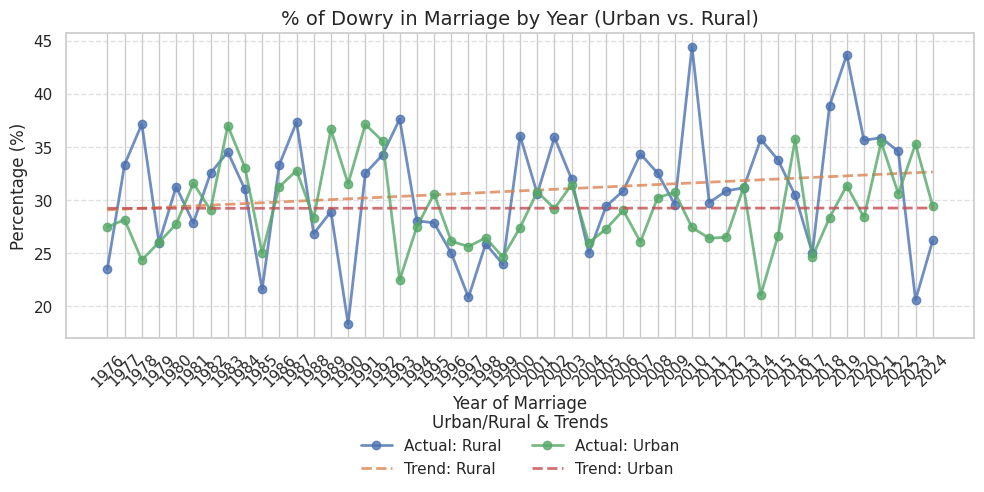

In [43]:
# % of Dowry in Marriage by Year and Urban/Rural
dowry_counts = df.groupby(['Year_of_Marriage', 'Urban_Rural'])['Dowry_Exchanged'].value_counts(normalize=True).unstack(fill_value=0)
dowry_percent = dowry_counts['Yes'] * 100

fig, ax = plt.subplots(figsize=(10, 6))
for category in dowry_percent.index.get_level_values(1).unique():
    data = dowry_percent.xs(category, level=1)
    ax.plot(data.index, data, marker='o', linestyle='solid', label=f'Actual: {category}', linewidth=2, alpha=0.8)
    x = data.index.astype(int)
    y = data.values
    slope, intercept = np.polyfit(x, y, 1)
    trend_line = slope * x + intercept
    ax.plot(x, trend_line, linestyle='dashed', linewidth=2, label=f'Trend: {category}', alpha=0.8)
ax.set_title('% of Dowry in Marriage by Year (Urban vs. Rural)', fontsize=14)
ax.set_xlabel('Year of Marriage', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticks(dowry_percent.index.get_level_values(0).unique())
ax.set_xticklabels(dowry_percent.index.get_level_values(0).unique(), rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(title='Urban/Rural & Trends', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

**Comments:**
- Analyzes the prevalence of dowry exchanges over time in urban vs. rural areas.

#### Marriage Trends by Income Level

In [44]:
# Count occurrences of Maraige Type per Income Level
parental_counts = df.groupby('Income_Level')['Marriage_Type'].value_counts().unstack(fill_value=0)

# Convert to percentage
parental_percentage = parental_counts.div(parental_counts.sum(axis=1), axis=0).mul(100)

# Combine both counts and percentages into one DataFrame
parental_summary = parental_counts.astype(str) + " (" + parental_percentage.round(2).astype(str) + "%)"

# Display result
print(parental_summary)

Marriage_Type       Arranged           Love
Income_Level                               
High            1234 (61.0%)    789 (39.0%)
Low            1813 (60.55%)  1181 (39.45%)
Middle          2975 (59.7%)   2008 (40.3%)


In [45]:
average_Age_of_Marriage = df.groupby('Income_Level')['Age_at_Marriage'].mean()
print(average_Age_of_Marriage)

Income_Level
High      28.436480
Low       28.571810
Middle    28.490267
Name: Age_at_Marriage, dtype: float64


### Summary of Findings
This analysis of the "Marriage Trends in India: Love vs. Arranged" dataset provides valuable insights into the evolving dynamics of marital preferences and their socio-cultural implications in India. The key findings are as follows:

1. **Temporal Trends**: The proportion of Love marriages has risen over time, while Arranged marriages exhibit a declining trend, signaling a gradual shift in societal norms.

2. **Age at Marriage**: Individuals in Love marriages marry at an average age of 28.54 years, slightly higher than the 28.47 years for Arranged marriages, suggesting marginal differences in life stage preferences.

3. **Educational Influence**: Education level exerts minimal influence on marriage type, with Arranged marriages consistently at approximately 60% and Love marriages at 40%. However, Graduates and Postgraduates exhibit a slightly higher inclination toward Love marriages compared to those with PhD or School-level education.

4. **Parental Approval**: Arranged marriages enjoy a high parental approval rate of 90.25% (Full/Partial), compared to 88.79% for Love marriages, underscoring the enduring role of familial consent in Indian marriages.

5. **Urban-Rural Divide**: Love marriages are marginally more prevalent in urban areas (39.9%), while Arranged marriages predominate in rural regions (60.4%). Trend analysis reveals that Love marriages were more prominent in urban areas from 1976 to 1999, but post-2005, their popularity has surged in rural settings.

6. **Religious Patterns**: Arranged marriages are most prevalent among Christians (62.7%), followed by Hindus (60.3%), Muslims (59.6%), Sikhs (58.7%), and other religions (58%), reflecting varying degrees of adherence to traditional practices.

7. **Marital Satisfaction**: Arranged marriages report a satisfaction rate of 80.1% (High + Medium), slightly surpassing Love marriages at 79.66%. Over time, satisfaction in Love marriages shows a declining trend, while it remains stable for Arranged marriages.

8. **Divorce Rates**: Love marriages exhibit a higher divorce rate (10.1%) compared to Arranged marriages. Early in marriage, Love marriages display elevated divorce rates; however, beyond 40 years, Arranged marriages surpass them. Additionally, divorce rates are decreasing in rural areas while rising in urban centers.

9. **Inter-Caste and Inter-Religion Dynamics**: Love marriages have higher inter-caste (30.1%) but lower inter-religion (20.1%) rates, whereas Arranged marriages show slightly lower inter-caste (29.4%) and higher inter-religion (20.4%) rates. Notably, Inter-Caste Arranged marriages have surged since 2003, overtaking Love marriages, while Inter-Religion Love marriages are declining.

10. **Spouse Employment**: Spouses in Love marriages are more likely to be employed (51.8%) compared to Arranged marriages (49.6%), potentially contributing to higher household income levels.

11. **Fertility Patterns**: Couples in Arranged marriages have an average of 2.53 children, slightly more than the 2.47 in Love marriages, indicating modest differences in family planning.

12. **Dowry Practices**: Dowry exchanges are more frequent in urban areas (31%) and show an upward trend, reflecting economic and cultural shifts.

13. **Income Influence**: Middle-income families exhibit a higher tendency toward Love marriages (40.3%) compared to low-income (39.45%) or high-income (39%) families. Higher income levels correlate with earlier marriages, suggesting economic stability as a factor in marital timing.

These findings offer a comprehensive perspective on marriage trends in India, highlighting the interplay of tradition, modernity, and socio-economic factors in shaping marital choices and outcomes.

### Additional Analysis Suggestions
1. **Correlation Analysis**:
   - Compute correlations between `Age_at_Marriage`, `Income_Level`, `Children_Count`, and `Marital_Satisfaction` to identify relationships.
   - Example: `sns.heatmap(df[['Age_at_Marriage', 'Children_Count', 'Marital_Satisfaction']].corr(), annot=True)`

2. **Box Plots**:
   - Create box plots to visualize the distribution of `Age_at_Marriage` or `Children_Count` by `Marriage_Type` or `Income_Level`.
   - Example: `sns.boxplot(x='Marriage_Type', y='Age_at_Marriage', data=df)`

3. **Regional Analysis**:
   - If the dataset includes a `Region` or `State` column, analyze marriage trends by geographic region.

4. **Satisfaction vs. Divorce**:
   - Cross-tabulate `Marital_Satisfaction` and `Divorce_Status` to see if lower satisfaction correlates with higher divorce rates.

5. **Time Series Forecasting**:
   - Use a simple model (e.g., ARIMA) to predict future trends in Love vs. Arranged marriage percentages based on `Year_of_Marriage`.

6. **Stacked Bar Charts**:
   - Visualize the composition of `Marriage_Type` within `Religion` or `Income_Level` using stacked bar charts for a clearer comparison.